In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

data['Arrival Delay in Minutes'].fillna(0)

# Setting up the aesthetics for the plots
sns.set(style="whitegrid")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


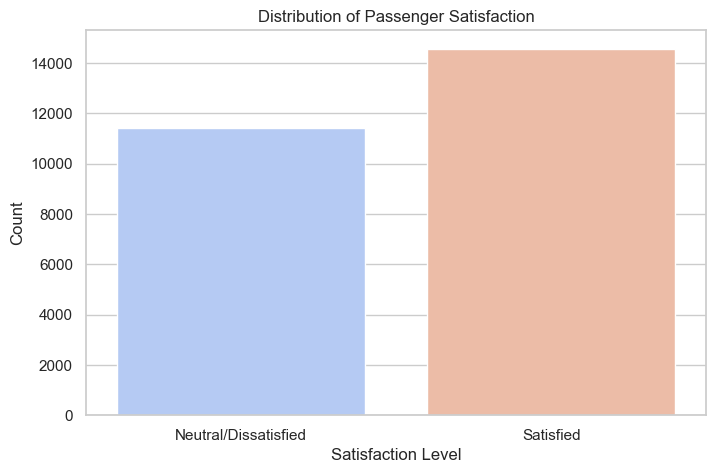

In [2]:
#Distribution of Passenger Satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x='satisfaction', data=data, palette='coolwarm')
plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Neutral/Dissatisfied', 'Satisfied'])
plt.show()

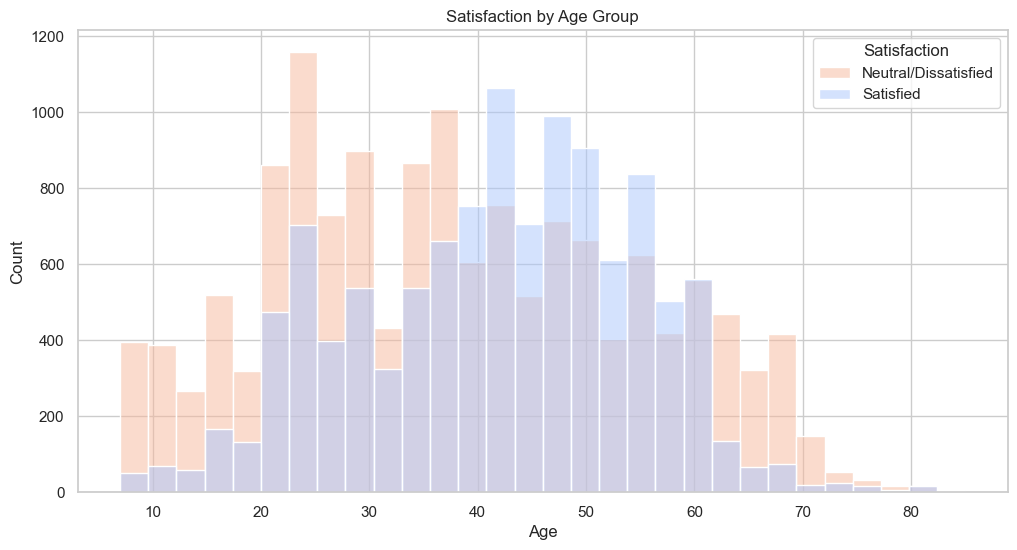

In [3]:
#Satisfaction by Age Group
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='satisfaction', palette='coolwarm', bins=30,)
plt.title('Satisfaction by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Satisfaction', labels=['Neutral/Dissatisfied', 'Satisfied'])
plt.show()

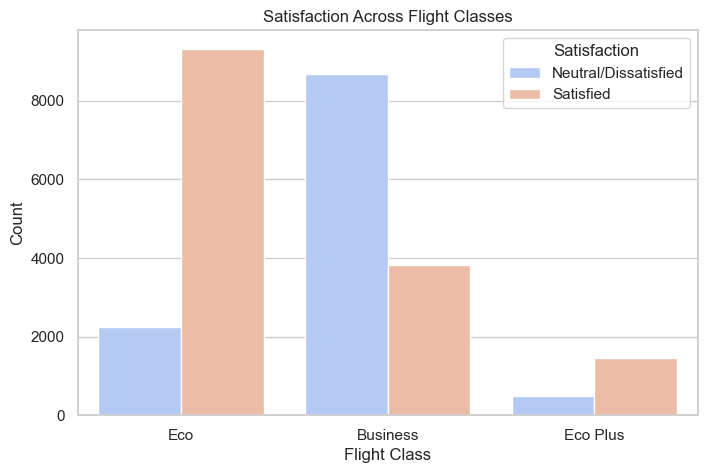

In [4]:
#Satisfaction Across Flight Classes
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', hue='satisfaction', data=data, palette='coolwarm')
plt.title('Satisfaction Across Flight Classes')
plt.xlabel('Flight Class')
plt.ylabel('Count')
plt.legend(title='Satisfaction', labels=['Neutral/Dissatisfied', 'Satisfied'])
plt.show()

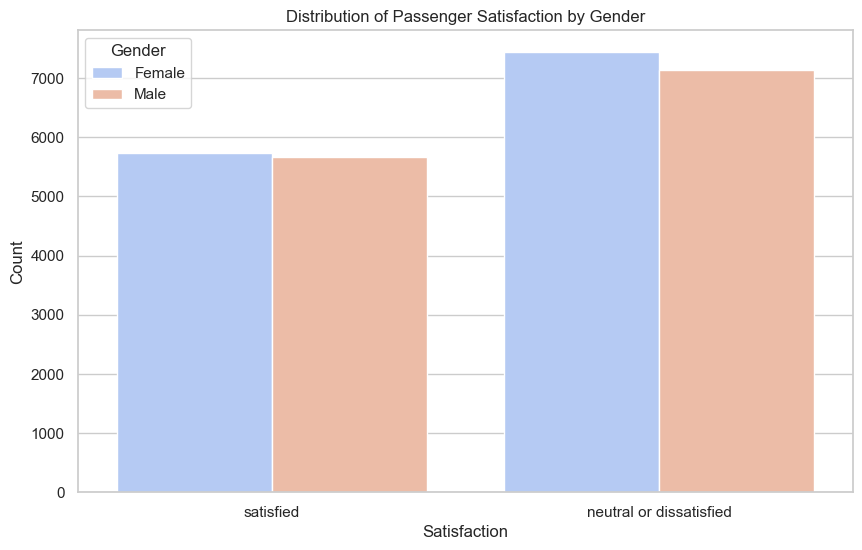

In [5]:
#Satisfaction by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', hue='Gender', data=data, palette='coolwarm')
plt.title('Distribution of Passenger Satisfaction by Gender')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

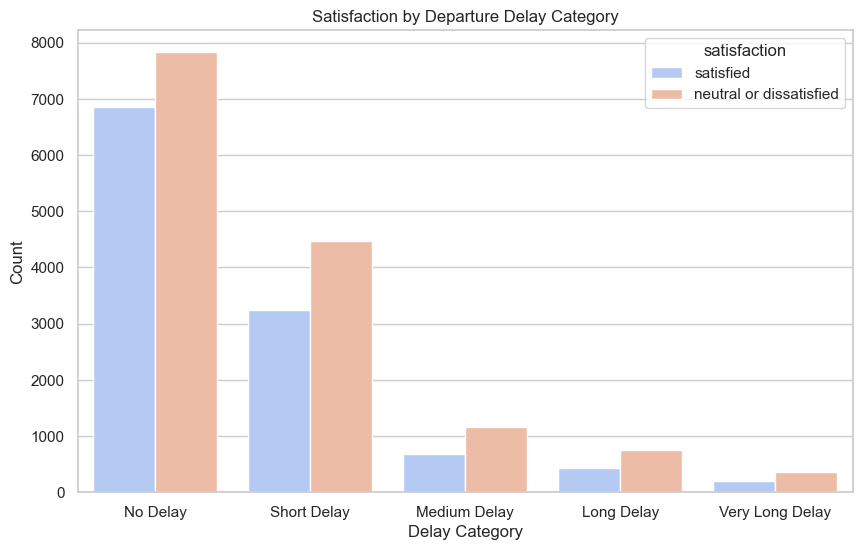

In [31]:
#Impact of Departure and Arrival Delays on Satisfaction
# Creating a new column for delay categories if not already created
if 'Delay Category' not in data:
    data['Delay Category'] = pd.cut(data['Departure Delay in Minutes'],
                                                 bins=[-1, 0, 30, 60, 120, float('inf')],
                                                 labels=['No Delay', 'Short Delay', 'Medium Delay', 'Long Delay', 'Very Long Delay'])
plt.figure(figsize=(10, 6))
sns.countplot(x='Delay Category', hue='satisfaction', data=data, palette='coolwarm')
plt.title('Satisfaction by Departure Delay Category')
plt.xlabel('Delay Category')
plt.ylabel('Count')
plt.show()

In [7]:
# Custom delay category
if 'Delay Category' not in data:
    data['Delay Category'] = pd.cut(data['Departure Delay in Minutes'],
                                    bins=[-1, 0, 30, 60, 120, float('inf')],
                                    labels=['No Delay', 'Short Delay', 'Medium Delay', 'Long Delay', 'Very Long Delay'])

# Prepare the data for plotting
delay_satisfaction_counts = data.groupby(['Delay Category', 'satisfaction']).size().reset_index(name='counts')
total_counts = delay_satisfaction_counts.groupby('Delay Category')['counts'].transform('sum')
delay_satisfaction_counts['percentage'] = (delay_satisfaction_counts['counts'] / total_counts * 100).round(2)

# Define custom colors
color_discrete_map = {
    'satisfied': 'rgb(252,190,187)',  # even lighter pink
    'neutral or dissatisfied': 'rgb(179,229,255)'  # even lighter blue
}
# Create the interactive plot
fig = px.bar(delay_satisfaction_counts, x='Delay Category', y='percentage', color='satisfaction',
             labels={'percentage': 'Percentage of Responses', 'Delay Category': 'Delay Category'},
             title='Satisfaction by Departure Delay Category',
             hover_data={'counts': True},
             color_discrete_map=color_discrete_map)

fig.show()

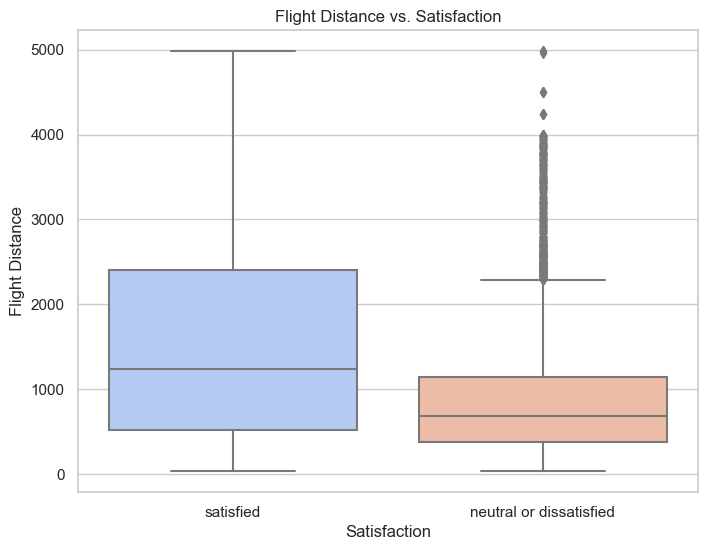

In [8]:
# Plotting Flight Distance vs. Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=data, palette='coolwarm')
plt.title('Flight Distance vs. Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance')
plt.show()

In [9]:
sns.pairplot(data=data, diag_kind='kde')